경사하강법을 코드로 표현

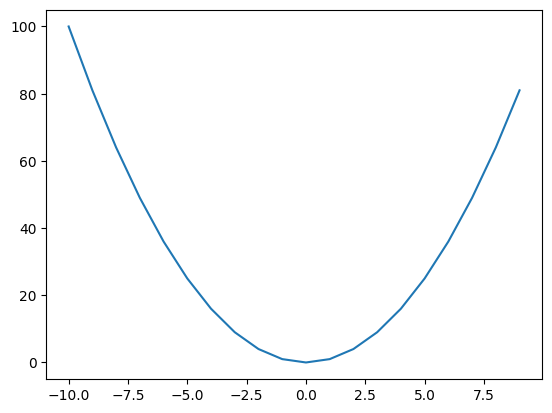

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
f_x = x**2

plt.plot(x, f_x)
plt.show()

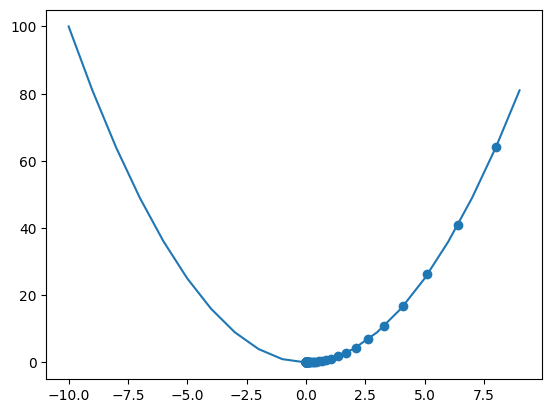

In [4]:
x_new = 10 # 시작지점
derivative = []
y = []
learning_rate = 0.1
for i in range(100):
  old_value = x_new
  x_new = old_value - learning_rate * 2 * old_value
  derivative.append(x_new)
  y.append(x_new**2)
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

선형회귀 성능 측정하기

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

MAE : 평균 절대 잔차, 모든 테스터 데이터에 대해 예측값과 실제값의 차이에 대해 절댓값을 구하고, 이 값을 모두 더한 후에 데이터의 개수만큼 나는 결과


In [6]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

RMSE : 평균제곱근 오차, 오차에 대해 제곱을 한 다음 모든 값을 더하여 평균을 낸 후(MSE) 제곱근을 구한다.

In [7]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

결정 계수 : 두 개의 값의 증감이 얼마나 일관성을 가지는지 나타내는 지표

In [8]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

경사하강법을 선형회귀로 구현

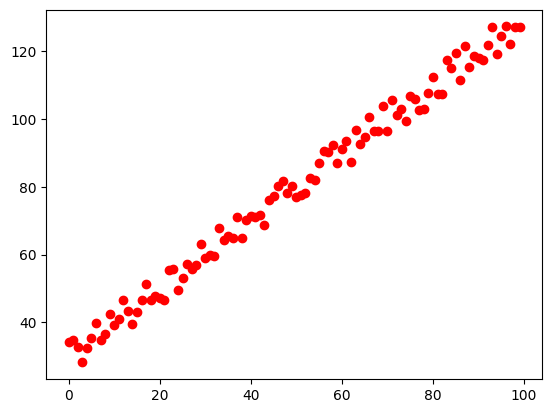

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints, bias, variance): # numPoints : 데이터 개수, bias : 절편, variance : 분산
  x = np.zeros(shape=(numPoints, 2))
  y = np.zeros(shape=numPoints)
  for i in range(0, numPoints):
    x[i][0] = 1
    x[i][1] = i
    y[i] = (i + bias) + random.uniform(0, 1) * variance
  return x, y

x, y = gen_data(100, 25, 10) # 데이터 200개 생성
plt.plot(x[:,1], y, "ro")
plt.show()


[[  1.00290084   1.19383774   1.37919407 ...   4.0229685    4.19043685
    4.35684632]
 [  2.14564899   2.62569357   2.80825537 ...   5.41217083   5.57711433
    5.74101492]
 [  3.28839713   4.0575494    4.23731667 ...   6.80137315   6.9637918
    7.12518352]
 ...
 [111.84947094 140.08385333 139.99814001 ... 138.77559379 138.69815231
  138.62120048]
 [112.99221909 141.51570916 141.4272013  ... 140.16479611 140.08482979
  140.00536908]
 [114.13496723 142.94756499 142.8562626  ... 141.55399843 141.47150727
  141.38953768]]


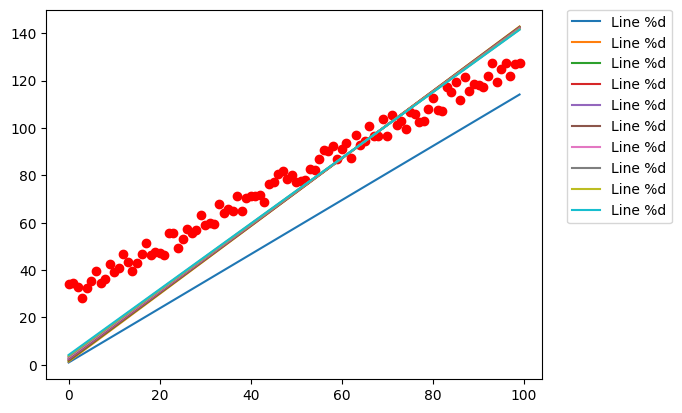

In [17]:
def gradient_descent(x, y, theta, alpha, m, iters):
  xTrans = x.transpose()
  theta_list = []
  cost_list = []
  for i in range(iters):
    hypothesis = np.dot(x, theta) # 예측값
    loss = hypothesis - y # error
    cost = np.sum(loss**2) / (2*m) #J
    gradient = np.dot(xTrans, loss) / m # gradient
    theta = theta - alpha * gradient
    if i % 250 == 0:
      theta_list.append(theta)
      cost_list.append(cost)
  return theta, np.array(theta_list), np.array(cost_list)

m, n = np.shape(x)
alpha = 0.0001 #learning rate
iters = 5000 # 반복 횟수
theta = np.ones(n)
theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, iters)

y_predict_step = np.dot(x, theta_list.transpose())
print(y_predict_step)
plt.plot(x[:,1], y, "ro")
for i in range(0, 20, 2):
  plt.plot(x[:,1], y_predict_step[:,i], label='Line %d')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()